# Compte-rendu Séance 01 -- Partie 3

On continue la construction de la classe `Sutom`. 

## Étape 05 : la mise à jour

- Quelles informations peut-on extraire des indications ? 
- Comment stocker ces informations ?

Voilà les deux questions auxquelles nous allons tenter de répondre.

### Quelles sont les apparitions des lettres dans le mot mystère ?

> La mot comporte-t-il un E ? si oui combien ?

Voià le genre d'interrogations que nous avons lors de la recherche du mot mystère. Cette information primordiale pour éliminer des mots et reduire le nombre de mots admissibles peut être modélisée par un dictionnaire. Nous allons donc ajouter une propriété `self.apparitions`  qui sera un dictionnaire dont les clés seront des lettres de l'alphabet et les valeurs associées le nombre d'apparitions de cette lettre dans le mot mystère, quand nous avons cette information bien sûr.

Ainsi au début ce dictionnaire est vide.

Voyons les informations sur un cas précis :

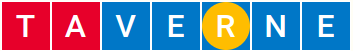

A la suite de la tentative ci-dessus, le dictionnaire qui comptabilise les apparitions des lettres dans le mot pourrait être :

```python
{'t':1, 'a':1, 'v':0, 'e':0, 'r':1, 'n':0}
```

Les lettre déclarées absentes font que le 0 est sûr et certain. Et si nous avions pour une lettre apparaissant 2 fois dans notre proposition, une fois avec un carré rouge et une fois avec un carré bleu alors nous saurions aussi que la lettre en question apparaît **exactement** 1 fois.

Par contre les lettres sans indication de carré bleu, peuvent apparaître plus que ce que nous voyons. C'est le cas des lettres T A et R qui sont présentes au moins une fois, mais potentiellement plus.

Ainsi, en plus de ce dictionnaire, nous allons ajouter une propriété `certitude` de type `set` qui va référencer les lettres pour lesquelles l'indication du nombre d'apparitions est une certitude et non un "_au moins_".

Nous devons aussi mémoriser les emplacements _interdits_ : dans l'exemple le R ne peut pas être à la position 4. Il nous faut là aussi un dictionnaire dont les clés sont les lettres et les valeurs associées des ensembles d'indices, les positions interdites.

Les nouvelles propriétés à ajouter sont donc :

- `self.apparitions` : qui va mémoriser l'information du nombre d'apparitions des lettres dans le mot mystère ; c'est un dictionnaire
- `self.certitude` : un ensemble contenant les lettres pour lesquelles l'information dans `selp.apparitions` est sûre (sinon c'est que c'est au moins la quantité indiquée mais ça peut être plus)
- `self.positions_interdites` : un dictionnaire pour mémoriser les positions interdites connues des lettres

### Étape 5.1 -- intégrer les informations de la proposition et de l'indication retour

- parcourir les lettres de la proposition :
    - méoriser le nombre d'apparitions de ces lettres dans la proposition,
    - noter les lettres qui sont déclarées absentes du mot mystère (celles avec 0 comme indication)
    - mettre à jour le motif avec les lettres bien placées (au passage on réalise que le choix d'une chaine de caractères pour le motif n'est pas une bonne idée puisque cette structure est non mutable)
    - noter les emplacements interdits pour les lettres mal placées : il faudra donc une nouvelle propriété
    
Cette étape 5.1 est réalisée par la méthode `add_information` :

```python
def add_informations(self, proposition, indications):
    """détaille le décompte des lettre dans la proposition (les lettres absentes et 
    combien de fois elles apparaissent + met à jour le motif, les positions interdites"""
    lettres_de_proposition = {lettre:0 for lettre in proposition}
    absentes = set()
    for i in range(self.taille):
        lettre, indication = proposition[i], indications[i]
        if indication == Sutom.BIEN_PLACEE:
            self.motif[i] = lettre
            lettres_de_proposition[lettre] += 1
        elif indication == Sutom.MAL_PLACEE:
            self.positions_interdites[lettre] = self.positions_interdites.get(lettre, set())
            self.positions_interdites[lettre].add(i)
            lettres_de_proposition[lettre] += 1
        else:
            absentes.add(lettre)
    return absentes, lettres_de_proposition
```

### Étape 5.2 -- Figer les infos pour les lettres absentes

Lorsqu'une lettre est absente, **attention** cela ne signifie pas qu'elle n'apparaît pas dans le mot... on peut imaginer faire une proposition avec deux E, le premier sera indiqué en carré rouge, signifiant que ce premier E est bien placé, et le deuxième est indiqué par un carré bleu, ce qui signifie qu'il n'y a pas de deuxième E dans le mot.

Il s'agit donc de parcourir les lettres del'ensemble `absentes`, ensemble mis à jour lors de l'étape 5.1 et qu'on renvoie en résultat, et figer le nombre d'apparitions :

```python
    for lettre in absentes:
        self.certitude.add(lettre)
        self.apparition[lettre] = lettres_de_proposition.get(lettre, self.apparition.get(lettre, 0))
```

### Étape 5.3 -- Mettre à jour les infos d'apparitions pour les autres lettres

Il faut aussi parcourir les lettres qu'on a comptabilisée dans la proposition et qui n'ont pas été déclarées absentes et mettre à jour leur apparition dans le dictionnaire `apparitions`. 

```python
for lettre in lettres_de_proposition:
    if lettre not in self.certitude:
        self.apparition[lettre] = lettres_de_proposition[lettre]
```

### Étape 5.4 -- Mettre à jour l'ensemble des mots possibles

Avec toutes ces infos mises à jour nous pouvons actualiser les mots admissibles, en retirant tous ceux qui ne respectent pas les nouvelles contraintes :

```python
self.mots = {mot for mot in self.mots if self.coincide(mot) and not self.interdit(mot)}
```

### En résumé notre classe `Sutom` mise à jour

```python
class Sutom:
    ...
    
    def __init__(self, motif):
        self.motif = list(motif) # ici il faut un mutable pour pouvoir mettre à jour
        self.taille = len(motif)
        self.mots = set() # l'ensemble des mots possibles pour le mot mystere
        self.dic = set()  # l'ensemble de tous les mots du dictionnaire francais
        
        # Les ajouts 
        self.apparitions = {}
        self.certitude = set()
        self.positions_interdites = {}
        
    ...
    
    def add_informations(self, proposition, indications):
        """5.1 détaille le décompte des lettre dans la proposition (les lettres absentes et 
        combien de fois elles apparaissent + met à jour le motif, les positions interdites"""
        lettres_de_proposition = {lettre:0 for lettre in proposition}
        absentes = set()
        for i in range(self.taille):
            lettre, indication = proposition[i], indications[i]
            if indication == Sutom.BIEN_PLACEE:
                self.motif[i] = lettre
                lettres_de_proposition[lettre] += 1
            elif indication == Sutom.MAL_PLACEE:
                self.positions_interdites[lettre] = self.positions_interdites.get(lettre, set())
                self.positions_interdites[lettre].add(i)
                lettres_de_proposition[lettre] += 1
            else:
                absentes.add(lettre)
        return absentes, lettres_de_proposition
             
    def update(self, proposition, indications):
        # 5.1
        absentes, lettres_de_proposition = self.add_informations(proposition, indications)

        # 5.2 : figer l'info des lettres déclarées absentes
        for lettre in absentes:
            self.certitude.add(lettre)
            self.apparitions[lettre] = lettres_de_proposition.get(lettre, self.apparition.get(lettre, 0))
        
        # 5.3 : 
        for lettre in lettres_de_proposition:
            if lettre not in self.certitude:
                self.apparitions[lettre] = lettres_de_proposition[lettre]
                
        # 5.4 : mettre à jour les most admissibles
        self.mots = {mot for mot in self.mots if self.coincide(mot) and not self.interdit(mot)}
```

## Étape 06 : détecter un mot interdit

Nous en faisons une étape 6 mais en réalité il s'agit d'une sous-étape de l'étape 5.4 dans la mise à jour des mots admissibles : détecter qu'un mot n'est plus admissible c'est-à-dire interdit.

Un mot est donc interdit si :

- une lettre de ce mot apparaît trop souvent, par rapport aux informations fournies par `self.apparitions` et `self.certitude`
- ou alors au contraire cette lettre n'apparaît pas assez
- enfin cette lettre apparaît à un emplacement interdit

Ce qui donne la méthode suivante:

```python
def interdit(self, mot):
    """Renvoie True ssi
        - une lettre du mot apparait trop souvent ou pas assez
        - une lettre est présente à une position où elle a été signifiée mal placée ou enfin
    """
    dans_le_mot = {lettre:mot.count(lettre) for lettre in mot}
    for pos, lettre in enumerate(mot):
        dans_le_mot[lettre] = dans_le_mot.get(lettre, 0) + 1
        if self.apparait_trop(lettre, dans_le_mot[lettre]):
            return True
        if self.position_interdite(lettre, pos):
            return True
        if self.apparait_pas_assez(lettre, dans_le_mot[lettre]):
            return True
    return False
```

Avec :

- une lettre apparaît trop si elle est dans `certitude` et que le nombre de fois où on l'a croisée dans la proposition est supérieure strictement à la valeur de cette lettre dans `self.apparitions` :

   ```python
   def apparait_trop(self, lettre, nb_fois):
       return lettre in self.apparitions and lettre in self.certitude and nb_fois > self.apparitions[lettre]
   ```
- une lettre n'apparaît pas assez si au contraire, si le nombre de fois où on l'a croisée dans la proposition est supérieure strictement à la valeur de cette lettre dans `self.apparitions` :

   ```python
   def apparait_pas_assez(self, lettre, nb_fois):
        return lettre in self.apparitions and nb_fois < self.apparitions[lettre]
   ```
- une lettre apparaît à une position interdite :

   ```python
   def position_interdite(self, lettre, pos):
       return lettre in self.positions_interdites and pos in self.positions_interdites[lettre]
   ```

## La classe finale, complète et fonctionnelle

In [1]:
class Sutom:
    
    DIC_FILE = 'sans_accent.dic'
    ENCODING = 'utf-8'
    JOKER = '*'
    SEUIL = 20
    
    BIEN_PLACEE = '1'
    MAL_PLACEE = '2'
    ABSENTE = '0'
    
    def __init__(self, motif):
        self.motif = list(motif) # ici il faut un mutable pour pouvoir mettre à jour
        self.taille = len(motif)
        self.mots = set() # l'ensemble des mots possibles pour le mot mystere
        self.dic = set()  # l'ensemble de tous les mots du dictionnaire francais
        
        # Les ajouts de l'étape 5
        self.apparitions = {}
        self.certitude = set()
        self.positions_interdites = {}
        
    def load(self):
        with open(Sutom.DIC_FILE, 'r', encoding=Sutom.ENCODING) as words:
            for word in words:
                self.dic.add(word.strip())
        self.mots = {mot for mot in self.dic if self.coincide(mot)}
        
    def coincide(self, mot):
        return self.taille == len(mot) and\
           all(self.motif[i] == Sutom.JOKER or self.motif[i] == mot[i] for i in range(self.taille))
    
    def infos(self):
        n = len(self.mots)
        if n <= Sutom.SEUIL:
            for mot in self.mots:
                print(mot)
        else:
            print(f'{n} possibilités...')
    
    def add_informations(self, proposition, indications):
        """détaille le décompte des lettre dans la proposition (les lettres absentes et 
        combien de fois elles apparaissent + met à jour le motif, les positions interdites"""
        lettres_de_proposition = {}
        absentes = set()
        for i in range(self.taille):
            lettre, indication = proposition[i], indications[i]
            if indication == Sutom.BIEN_PLACEE:
                self.motif[i] = lettre
                lettres_de_proposition[lettre] = lettres_de_proposition.get(lettre, 0) + 1
            elif indication == Sutom.MAL_PLACEE:
                self.positions_interdites[lettre] = self.positions_interdites.get(lettre, set())
                self.positions_interdites[lettre].add(i)
                lettres_de_proposition[lettre] = lettres_de_proposition.get(lettre, 0) + 1
            else:
                absentes.add(lettre)
        return absentes, lettres_de_proposition

    def position_interdite(self, lettre, pos):
        """renvoie True ssi pos est une position identifée comme interdite pour lettre"""
        return lettre in self.positions_interdites and pos in self.positions_interdites[lettre]
    
    def apparait_trop(self, lettre, nb_fois):
        """renvoie True ssi nb_fois c'est trop d'apparition pour lettre au regard des infos connues"""
        return lettre in self.apparitions and nb_fois > self.apparitions[lettre] and lettre in self.certitude

    def apparait_pas_assez(self, lettre, nb_fois):
        return lettre in self.apparitions and nb_fois < self.apparitions[lettre]

    def interdit(self, mot):
        """Renvoie True ssi
            - une lettre du mot apparait trop souvent ou pas assez
            - une lettre est présente à une position où elle a été signifiée mal placée ou enfin
        """
        dans_le_mot = {lettre:mot.count(lettre) for lettre in mot}
        for pos, lettre in enumerate(mot):
            if self.apparait_trop(lettre, dans_le_mot[lettre]):
                return True
            if self.position_interdite(lettre, pos):
                return True
            if self.apparait_pas_assez(lettre, dans_le_mot[lettre]):
                return True
        return False
                         
    def update(self, proposition, indications):
        # 5.1
        absentes, lettres_de_proposition = self.add_informations(proposition, indications)
        
        # 5.2 : figer l'info des lettres déclarées absentes
        for lettre in absentes:
            self.certitude.add(lettre)
            if lettre not in self.apparitions:
                self.apparitions[lettre] = lettres_de_proposition.get(lettre, 0)
        
        # 5.3 : si une lettre de la proposition n'a pas été déclarée absente, son apparition 
        # dans le mot mystère est au moins égale à son apparition dans la proposition
        for lettre in lettres_de_proposition:
            if lettre not in self.certitude:
                self.apparitions[lettre] = lettres_de_proposition[lettre]
                
        # 5.4 : mettre à jour les most admissibles
        self.mots = {mot for mot in self.mots if self.coincide(mot) and not self.interdit(mot)}
    
    def dialogue(self):
        proposition, indications = '', ''
        while len(proposition) != self.taille:
            proposition = input('Votre proposition : ')
        while len(indications) != self.taille:
            indications = input('Les indications   : ')
        self.update(proposition, indications)
        self.infos()

## Test

### Création d'une instance

In [2]:
s = Sutom('m******')

### Chargement du dictionnaire français

In [3]:
s.load()

### On peut vérifier que les mots admissibles ont été initialisés

In [4]:
len(s.mots)

1422

### Premier dialogue

In [5]:
s.dialogue()

Votre proposition :  matinee
Les indications   :  1020021


24 possibilités...


### Deuxième dialogue

In [6]:
s.dialogue()

Votre proposition :  mouette
Les indications   :  1002201


mystere


On sait donc qu'il s'agit du mot MYSTERE.